**Aerofit** is one of the leading fitness equipment brands in India. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people. It was founded in 1928.

As of today, they have multiple retail stores spread throughout the country.

- **The objective of this project is to provide information to the sales team that can help them to profile the customer more accurately and help them to identify a potential customer easily.**
- **This analysis will also help to increase overall sales by targeting the right customer with the right product.**

This research is more focused on the below three treadmill models introduced by Aerofit in the market.

- **The KP281 is an entry-level treadmill that sells for $1,500.**
- **The KP481 is for mid-level runners that sell for $1,750.**
- **The KP781 treadmill is having advanced features that sell for $2,500.**

# ***1. Dataset***

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("Aerofit_Data.csv")

#### ***How the data looks.***

In [42]:
df.head(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47
5   KP281   20  Female         14     Partnered      3        3   32973     66
6   KP281   21  Female         14     Partnered      3        3   35247     75
7   KP281   21    Male         13        Single      3        3   32973     85
8   KP281   21    Male         15        Single      5        4   35247    141
9   KP281   21  Female         15     Partnered      2        3   37521     85

#### ***Column Discriptions***
1. **Product Purchased:**	KP281, KP481, or KP781.
2. **Age:**	                In years
3. **Gender:**	            Male/Female
4. **Education:**	        In years
5. **MaritalStatus:**	    Single or partnered
6. **Usage:**	            The average number of times the customer plans to use the treadmill each week.
7. **Income:**	            Annual income (in $)
8. **Fitness:**	            Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
9. **Miles:**	            The average number of miles the customer expects to walk/run each week

In [43]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

#### ***We have a data of 180 samples***

In [44]:
df.shape

(180, 9)

# ***2. Missing Data Analysis***

#### ***There are no missing data***

In [45]:
df.isnull().sum(axis=0)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# ***3. Verifying the values in the each columns.***

In [46]:
df.agg([min,max])

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
min   KP281   18  Female         12     Partnered      2        1   29562   
max   KP781   50    Male         21        Single      7        5  104581   

     Miles  
min     21  
max    360

 ***The "Miles" have an unrealistic value of 360. Lets check all the values of this column.***

In [47]:
df.describe(include = 'all')

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

#### ***From the above table we can find the **Median** values***
1. **median(Age)** : 26
2. **median(Education)** : 16
3. **median(Fitness)** : 3
4. **median(Income)** : 50596
5. **median(Miles)** : 94

#### ***Also,from the above table we can find the **Mean** values***
1. **mean(Age)** : 28.7
2. **mean(Education)** : 15.5
3. **mean(Fitness)** : 3.45
4. **mean(Income)** : 55719.57
5. **mean(Miles)** : 103.19

#### *****Miles**,**Income** columns have most number of outliers***
#### ***The Histogram of **Miles** and **Income** is highly left skewed*** 

In [48]:
fig = plt.figure(figsize=(15,20))

plt.subplot(5,2,1)
sns.boxplot(df,x = "Age")

plt.subplot(5,2,2)
sns.histplot(data = df,x = "Age", kde = True, bins= 20)

plt.subplot(5,2,3)
sns.boxplot(df,x = "Education")

plt.subplot(5,2,4)
sns.histplot(data = df,x = "Education", kde = True, bins= 20)

plt.subplot(5,2,5)
sns.boxplot(df,x = "Fitness")

plt.subplot(5,2,6)
sns.histplot(data = df,x = "Fitness", kde = True, bins= 5)

plt.subplot(5,2,7)
sns.boxplot(df,x = "Income")

plt.subplot(5,2,8)
sns.histplot(data = df,x = "Income", kde = True, bins= 20)

plt.subplot(5,2,9)
sns.boxplot(df,x = "Miles")

plt.subplot(5,2,10)
sns.histplot(data = df,x = "Miles", kde = True, bins= 20)

plt.show()



***The data here is highly skewed due to the presence of the outliers.***

# ***4. Univariate Analysis***

In [49]:
y = sns.histplot(data = df, x = "Product", shrink = 0.5, color = "Green")
y.bar_label(y.containers[0])

[Text(0, 0, '80'), Text(0, 0, '60'), Text(0, 0, '40')]

### ***Insights***
1. From the above graph its evident that **KP281** is highest selling product out of the three product.
followed by **KP481** and **KP781**

In [50]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
y = sns.histplot(data = df, x = "Gender", shrink = 0.5, color = "Green")
y.bar_label(y.containers[0])

plt.subplot(2,3,2)
y = sns.histplot(data = df, x = "MaritalStatus", shrink = 0.5, color = "yellow")
y.bar_label(y.containers[0])

plt.subplot(2,3,3)
y = sns.histplot(data = df, x = "Age", shrink = 0.5, color = "Blue")
y.bar_label(y.containers[0])

plt.subplot(2,3,4)
y = sns.histplot(data = df, x = "Fitness", shrink = 0.5, color = "Grey",bins=5)
y.bar_label(y.containers[0])

plt.subplot(2,3,5)
y = sns.histplot(data = df, x = "Education", shrink = 0.5, color = "Red",bins=5)
y.bar_label(y.containers[0])

plt.subplot(2,3,6)
y = sns.histplot(data = df, x = "Income", shrink = 0.5, color = "Red",bins=5)
y.bar_label(y.containers[0])

plt.show()


### ***Insights:***
1. Male customer purchase more.
2. Partnered customer purchase more. 
3. Customer age betwwen 21 and 35 purchase more.
4. Customer with 3.0 fitness rating purchase more.
5. customer with education between 14 and 17 purchase more.
6. Customer with salary betwween 45K- 60K purchase more.

# ***5. Bivariate Analysis***

#### ***Binning the age column***
Age 0 -18 --> Teen

Age 19 - 35 --> Adult

Age 35 - 60 --> Middle Aged

Age 60 -100 --> Senior

#### ***Binning the Education column***
Education 0 -15 --> Average

Education 15 - 18 --> High

Education 18 - 25 --> Very High

#### ***Binning the Income column***
Income 0K - 50K --> Average

Income 50K - 70K --> High

Income 70K - 90K --> Very High

Income 90K - 110K --> Super High

In [51]:
df.Education.unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [52]:
df["Age Category"] = pd.cut(x=df["Age"], bins = [1,18,35,60,100], labels=["Teen","Adult","Mid Aged","Senior"])
df[["Product","Age","Age Category"]].head()

Product  Age Age Category
0   KP281   18         Teen
1   KP281   19        Adult
2   KP281   19        Adult
3   KP281   19        Adult
4   KP281   20        Adult

In [53]:
df["Education Category"] = pd.cut(x=df["Education"], bins = [1,15,18,25], labels=["Average","High","Very High"])
df[["Product","Education","Education Category"]].head(5)

Product  Education Education Category
0   KP281         14            Average
1   KP281         15            Average
2   KP281         14            Average
3   KP281         12            Average
4   KP281         13            Average

In [54]:
df["Income Category"] = pd.cut(x=df["Income"], bins = [0,50000,70000,90000,110000], labels=["Average","High","Very High","Super High"])
df[["Product","Income","Income Category"]].head(5)

Product  Income Income Category
0   KP281   29562         Average
1   KP281   31836         Average
2   KP281   30699         Average
3   KP281   32973         Average
4   KP281   35247         Average

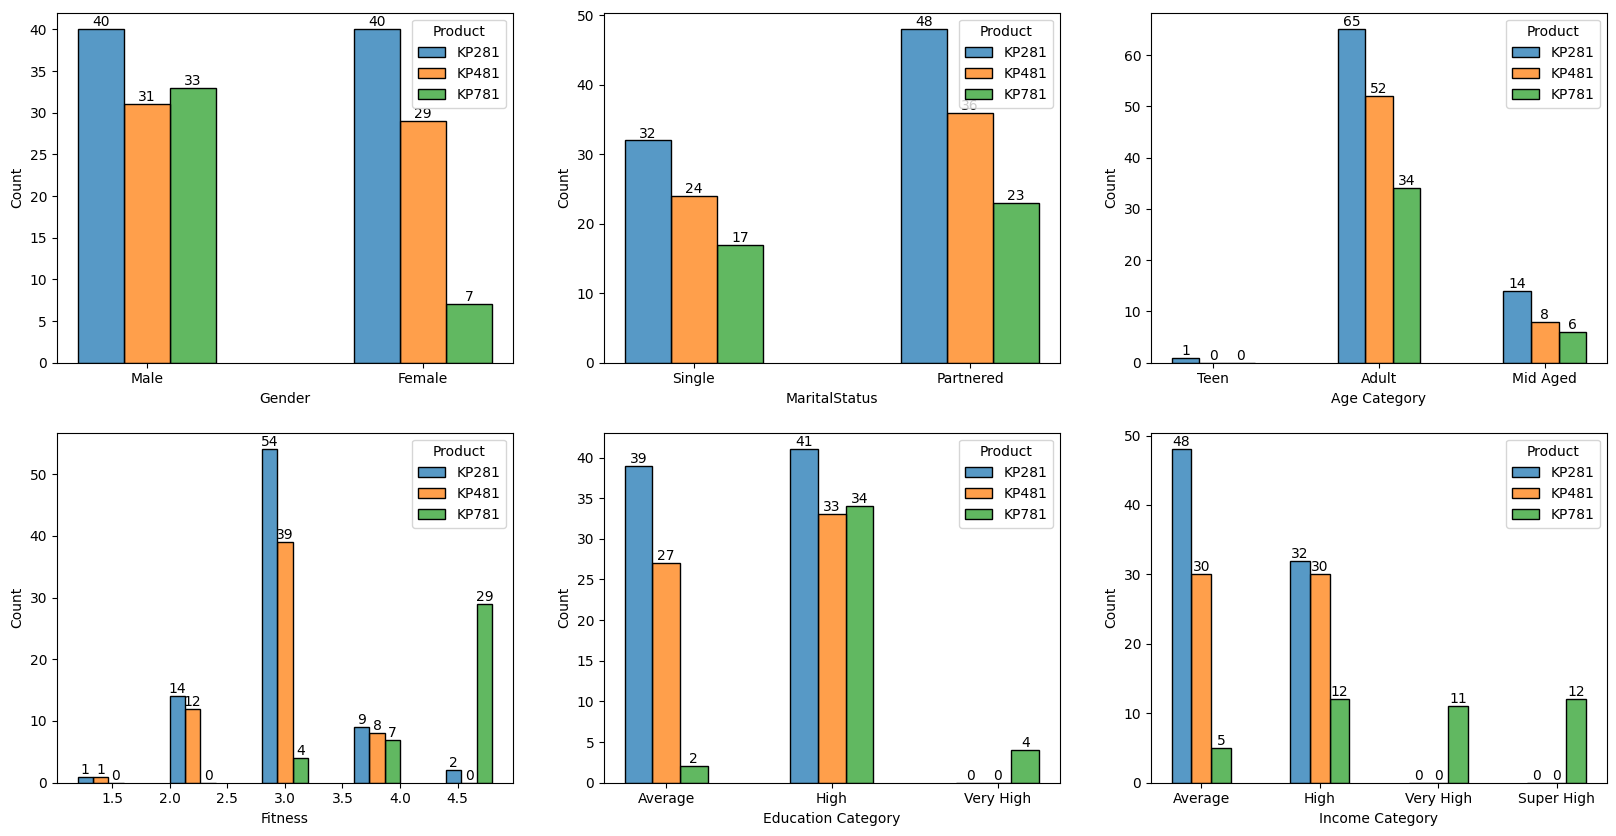

In [55]:
def fn_bar_label(y):
    for bar in y.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        text = f'{bar_value:,}'
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        text_y = bar.get_y() + bar_value
        # If we want the text to be the same color as the bar, we can
        # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        y.text(text_x, text_y, text, ha='center', va='bottom')
        #fig = plt.figure(figsize=(20,10))

fig = plt.figure(figsize=(20,10))

ax = plt.subplot(2,3,1)
y = sns.histplot(data = df, x = "Gender", shrink = 0.5, color = "Green", hue= "Product",multiple = "dodge")
#ax.legend( ncols=3)
fn_bar_label(y)

plt.subplot(2,3,2)
y = sns.histplot(data = df, x = "MaritalStatus", shrink = 0.5, color = "yellow",hue= "Product",multiple = "dodge")
fn_bar_label(y)

plt.subplot(2,3,3)
y = sns.histplot(data = df, x = "Age Category", shrink = 0.5, color = "Blue",hue= "Product",multiple = "dodge")
fn_bar_label(y)

plt.subplot(2,3,4)
y = sns.histplot(data = df, x = "Fitness", shrink = 0.5, color = "Grey",bins=5,hue= "Product",multiple = "dodge")
fn_bar_label(y)

plt.subplot(2,3,5)
y = sns.histplot(data = df, x = "Education Category", shrink = 0.5, color = "Red",bins=5,hue= "Product",multiple = "dodge")
fn_bar_label(y)

plt.subplot(2,3,6)
y = sns.histplot(data = df, x = "Income Category", shrink = 0.5, color = "Red",bins=5,hue= "Product",multiple = "dodge")
fn_bar_label(y)

plt.show()

#### ***Insights***
#### **Product Vs Gender**
1. Male customer genrally purchase all the three products (KP281,KP481,KP781).
2. Female customer more purchasing KP281,KP481.

#### **Product Vs MaritialStatus**
3. Partnered customer purchasing KP281,KP481 more.

#### **Product Vs Age**
4. Customer age betwwen 19 and 35 purchasing significantly more then Teen,Mid-Aged and Seniors.
5. These customers are purchansing KP281,KP481 more

#### **Product Vs Fitness**
6. Customer with 3.0 fitness rating purchase KP281 more.
7. Customer with fitness 4.5 purchases KP781

#### **Product Vs Education**
8. customer with education between 14 and 17 purchase more.
9. These customers are purchansing KP281,KP481 more.
10. These customers with Education 18-19 are purchansing KP781 more.

#### **Product Vs Income**
11. Customer with salary betwween 45K- 60K purchase KP281,KP481 more.
12. Customer with salary betwween 100K and more purchase KP781 more.

# ***6. Corelation between the columns***

***Let's try to get find out wether there is any relationship between the columns***

#### ***Convert **Gender** and **MaritalStatus** into numerical values*** 

***Lets convert the **Gender** into a numeric values***

1 = Male

0 = Female

***Lets convert the **MaritalStatus** into a numeric values***

1 = Partnered

0 = Single

In [56]:
def Convert_Gender(x):
    if x == "Male":
        return 1
    else:
        return 0

df["Gender_N"] = df["Gender"].apply(Convert_Gender)
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles Age Category Education Category Income Category  Gender_N  
0    112         Teen            Average         Average         1  
1     75        Adult            Average         Average         1  
2     66        Adult            Average         Average         0  
3     85        Adult            Average         Average         1  
4     47        Adult            Average         Average         1

In [57]:
def Convert_MaritalStatus(x):
    if x == "Partnered":
        return 1
    else:
        return 0

df["MaritalStatus_N"] = df["MaritalStatus"].apply(Convert_MaritalStatus)
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles Age Category Education Category Income Category  Gender_N  \
0    112         Teen            Average         Average         1   
1     75        Adult            Average         Average         1   
2     66        Adult            Average         Average         0   
3     85        Adult            Average         Average         1   
4     47        Adult            Average         Average         1   

   MaritalStatus_N  
0                0  
1                0  
2                1  
3                0  
4                1

In [58]:
df_corr = df[["Age","Gender_N","Education","MaritalStatus_N","Usage","Fitness","Income","Miles"]].corr()

<Axes: >

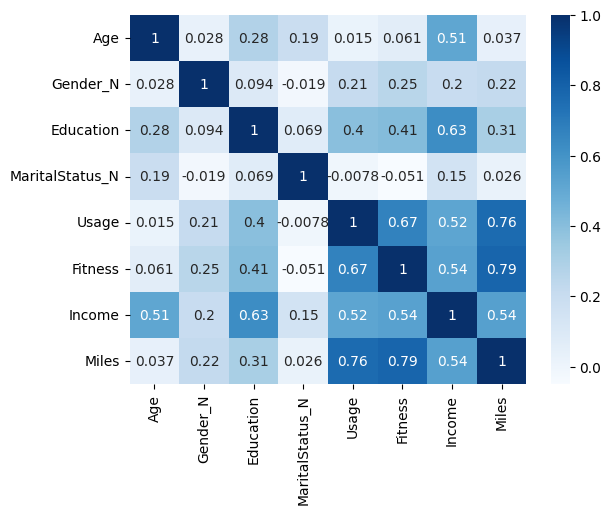

In [59]:
sns.heatmap(data = df_corr, cmap = "Blues",annot=True)

##### ***Insights***
1. **Usage <-> Miles** are highly related
2. **Fitness <-> Miles** are highly related
3. **Education <-> Income** are highly related

# ***7. Probabilities***
#### ***Marginal Probabilities***


In [60]:
def output__marginal_probapilities(df,col):
    joint_prob_df = pd.crosstab(index = df[col],columns = df["Product"],normalize="all")
    for row_index in np.array(joint_prob_df.index):
        for col_index in np.array(joint_prob_df.columns):
            probability = round(joint_prob_df.loc[row_index,col_index] * 100,2)
            if (probability > 20):
                print(col_index, "--->", f"P({col} = {row_index}) ".ljust(35,' '), " = ", probability, "%")

column_list = ["Gender","Education Category","MaritalStatus","Fitness","Age Category","Income Category"]

for first_col in column_list:
    #print(f"Joint Probability for P[{first_col}]")
    output__marginal_probapilities(df,first_col)
    #print()


KP281 ---> P(Gender = Female)                   =  22.22 %
KP281 ---> P(Gender = Male)                     =  22.22 %
KP281 ---> P(Education Category = Average)      =  21.67 %
KP281 ---> P(Education Category = High)         =  22.78 %
KP281 ---> P(MaritalStatus = Partnered)         =  26.67 %
KP281 ---> P(Fitness = 3)                       =  30.0 %
KP481 ---> P(Fitness = 3)                       =  21.67 %
KP281 ---> P(Age Category = Adult)              =  36.11 %
KP481 ---> P(Age Category = Adult)              =  28.89 %
KP281 ---> P(Income Category = Average)         =  26.67 %


##### ***Insights***
1. **Adult** customers are more likely to purchase the **KP281** and **KP481**. 
2. Fittness **3** customers are more likely purchase the **KP281** and **KP481**. 
3. **Partnered** and **Average** income customers are more likely purshase **KP281**.

#### ***Joint Probabilities***

In [61]:
def output_joint_probability(df,col):
    joint_prob_df = pd.crosstab(index = [df[col[0]], df[col[1]]], columns = df["Product"], normalize="all").reset_index()
    for row_index in np.array(joint_prob_df.index):
        for col_index in ["KP281","KP481","KP781"]:
            probability = round(joint_prob_df.loc[row_index,col_index] * 100,2)
            if (probability > 20):
                print(col_index, "--->", \
                      f"P({col[0]} = {joint_prob_df.loc[row_index,col[0]]} ∩ {col[1]} = {joint_prob_df.loc[row_index,col[1]]}) ".ljust(60,' '), " = ", probability, "%")

column_list = ["Gender","Education Category","MaritalStatus","Fitness","Age Category","Income Category"]

for first_col in column_list:
    for second_col in column_list:
        if (first_col != second_col):
            #print(f"Joint Probability for P[{first_col} ∩ {second_col}]")
            output_joint_probability(df,[first_col,second_col])
            #print()

KP281 ---> P(MaritalStatus = Partnered ∩ Age Category = Adult)           =  20.56 %
KP281 ---> P(Fitness = 3 ∩ Age Category = Adult)                         =  23.89 %
KP281 ---> P(Age Category = Adult ∩ MaritalStatus = Partnered)           =  20.56 %
KP281 ---> P(Age Category = Adult ∩ Fitness = 3)                         =  23.89 %
KP281 ---> P(Age Category = Adult ∩ Income Category = Average)           =  24.44 %
KP281 ---> P(Income Category = Average ∩ Age Category = Adult)           =  24.44 %


##### ***Insights***
1. **Adult** and fitness **3** customers are more likely to purchase the **KP281**. 
2. **Average** Income and Fitness **3** customers are more likely purchase the **KP281**. 

#### ***Conditional Probabilities***

In [62]:
def output_cond_probability(df,col):
    joint_prob_df = pd.crosstab(index = df[col],columns = df["Product"],normalize="index")
    for row_index in np.array(joint_prob_df.index):
        for col_index in np.array(joint_prob_df.columns):
            probability = round(joint_prob_df.loc[row_index,col_index] * 100,2)
            if (probability >= 50):
                print(f"P({col_index} | {row_index}) ".ljust(35,' '), " = ", probability, "%")

column_list = ["Gender","Education Category","MaritalStatus","Fitness","Age Category","Income Category"]

for first_col in column_list:
    print(f"Conditional Probability for {first_col}")
    output_cond_probability(df,first_col)
    print()

Conditional Probability for Gender
P(KP281 | Female)                    =  52.63 %

Conditional Probability for Education Category
P(KP281 | Average)                   =  57.35 %
P(KP781 | Very High)                 =  100.0 %

Conditional Probability for MaritalStatus

Conditional Probability for Fitness
P(KP281 | 1)                         =  50.0 %
P(KP481 | 1)                         =  50.0 %
P(KP281 | 2)                         =  53.85 %
P(KP281 | 3)                         =  55.67 %
P(KP781 | 5)                         =  93.55 %

Conditional Probability for Age Category
P(KP281 | Teen)                      =  100.0 %
P(KP281 | Mid Aged)                  =  50.0 %

Conditional Probability for Income Category
P(KP281 | Average)                   =  57.83 %
P(KP781 | Very High)                 =  100.0 %
P(KP781 | Super High)                =  100.0 %



##### ***Insights***
1. Customer with the fitness **5** are more likely purchase **KP781**.
2. Customer with the **Very High** Education are more likely purchase **KP781**. 
3. **Teen** Customer are more likely purchase **KP781**.
4. Customers whith **Very High** and **Super High** income more likely purchase **KP781**.


# ***8. Profiling Customers***
***Probabilities to decide which product should be targertted to the customer.***

In [63]:
column_list = ["Gender","Education Category","MaritalStatus","Fitness","Age Category","Income Category"]
(round(pd.crosstab(index = [   df["Gender"], \
                        df["Fitness"], \
                        df["Education Category"], \
                        df["MaritalStatus"], \
                        df["Age Category"], \
                        df["Income Category"] \
                        ],columns = df["Product"],normalize="index")*100)).reset_index().head(50)

Product  Gender  Fitness Education Category MaritalStatus Age Category  \
0        Female        1               High        Single        Adult   
1        Female        2            Average     Partnered        Adult   
2        Female        2            Average     Partnered        Adult   
3        Female        2            Average        Single        Adult   
4        Female        2               High     Partnered        Adult   
5        Female        2               High     Partnered     Mid Aged   
6        Female        2               High        Single        Adult   
7        Female        3            Average     Partnered        Adult   
8        Female        3            Average     Partnered        Adult   
9        Female        3            Average     Partnered     Mid Aged   
10       Female        3            Average        Single        Adult   
11       Female        3            Average        Single        Adult   
12       Female        3               High     Partnered        Adult   
13       Female        3               High     Partnered        Adult   
14       Female        3               High     Partnered     Mid Aged   
15       Female        3               High     Partnered     Mid Aged   
16       Female        3               High        Single        Adult   
17       Female        3               High        Single        Adult   
18       Female        3               High        Single     Mid Aged   
19       Female        3          Very High        Single        Adult   
20       Female        4            Average     Partnered        Adult   
21       Female        4            Average        Single        Adult   
22       Female        4               High        Single        Adult   
23       Female        4               High        Single        Adult   
24       Female        4               High        Single     Mid Aged   
25       Female        5               High     Partnered        Adult   
26       Female        5               High     Partnered        Adult   
27       Female        5               High     Partnered        Adult   
28       Female        5               High        Single        Adult   
29         Male        1               High     Partnered        Adult   
30         Male        2            Average     Partnered        Adult   
31         Male        2            Average     Partnered        Adult   
32         Male        2            Average        Single        Adult   
33         Male        2               High     Partnered        Adult   
34         Male        2               High     Partnered        Adult   
35         Male        2               High     Partnered     Mid Aged   
36         Male        3            Average     Partnered        Adult   
37         Male        3            Average     Partnered        Adult   
38         Male        3            Average        Single        Adult   
39         Male        3            Average        Single        Adult   
40         Male        3            Average        Single     Mid Aged   
41         Male        3            Average        Single     Mid Aged   
42         Male        3               High     Partnered        Adult   
43         Male        3               High     Partnered        Adult   
44         Male        3               High     Partnered     Mid Aged   
45         Male        3               High     Partnered     Mid Aged   
46         Male        3               High        Single        Adult   
47         Male        3               High        Single        Adult   
48         Male        3               High        Single        Adult   
49         Male        4            Average     Partnered        Adult   

Product Income Category  KP281  KP481  KP781  
0                  High    0.0  100.0    0.0  
1               Average  100.0    0.0    0.0  
2                  High   50.0   50.0    0.0  
3               Average   25.0   75.0

# ***9. Recommendations***
1. **Very High** and **Super High** income customers have a 100% probability of purchasing  **KP781**.So we should advice the sales them this model.
2. If a customer fitness selg ratings is **5**.So we should advice the sales guy to target them for **KP781** model.
3. We can advice the sales guy to know the **MaritialStatus** of customer. as the "Partnered" customers have high probability of purchasing a product.
4. **Teens** have a high probability of purchasing **KP781**.They have a tendency of implulsive buying so.We can advice Sales to persue these type of customer little harder.
5. **Adult** customers are more buyers in all the three segment.So we can advice sales to profile them for all the three products.